# Data Analytics Fall 2025 &mdash; Exercises 3

### XXXXX XXXXX

Last modified: Tue 30 Sep

- Five problems + round 2 peer review
- Theme: plotting, statistics, git
- Please make both your code and your notebook readable
- Keep your originals up to date by running the code cell below:

In [ ]:
import os
os.system('/bin/bash /home/varpha/dan/config.sh');

## Greetings from Harri

You don't need to lose your goodnight sleep because of problem 5. I just left the AI-generated stuff (part c) there, and it can look frightening... But you should concentrate on the very first sentence of the problem: *"Your task is..."*. I'm genuinely interested in the answers, and I don't know them well beforehand myself!

## How to submit my solutions?

Open a Terminal tab (e.g. <tt>File $\rightarrow$ New $\rightarrow$ Terminal</tt>, copy-paste the following into the Terminal command prompt, and press enter:
<pre>
  /home/varpha/dan/menu.py
</pre>

## Round 2 peer review

Similar to Round 1 peer review! See exercises 2. By now you should more or less know how to do this. :) See Tue Sep 30 recording / ask your fellow students.

# Use of AI in this exercise
Almost everything is pretty new to me so I leveraged AI to:
- Learn new concepts related to tasks
- Brainstorm solutions
- Generate and adapt sample code to solve the problems


## Problem 1. Gitlab (part 1/2)

a) Please create a private [LabraNet GitLab](https://gitlab.labranet.jamk.fi) project named `data-analytics-fall-2025` for this course.

  + See e.g. [these instructions](https://docs.gitlab.com/ee/user/project/).

  > <span style="font-size:0.8em;"><b>A clarification:</b> There is the public GitLab (gitlab.com) server available for anyone, and then we have our own LabraNet GitLab server available for LabraNet users. The public one sometimes has better documentation.</span>


b) 
   + Add user `x1234` (@x12341) as a **maintainer** for your project.
   + (Only maintainers can push to main branch. This gives Harri the possibility to modify your project if needed.)
   + See e.g. [these instructions](https://docs.gitlab.com/ee/user/project/members/#add-users-to-a-project).

Harri will let you know how it went in a Teams thread. Easy one point for all!

**Why** are we doing this:
   - It's good to get acquainted with a <tt>git</tt> instance (such as GitLab). Nowadays it's a standard in data science (among many other fields).
   - It's good to have a backup system available, in case the hub or vpn or something fails at a critical moment.
   - More details in our Teams sessions and our Theory notes!


### Solution 1
Performed the metioned tasks on [LabraNet GitLab](https://gitlab.labranet.jamk.fi)
 - Created private project named `data-analytics-fall-2025`
 - Added user `x1234` (@x12341) as a **maintainer** for the created project.

## Problem 2. Simulation.

A seminar runs a regular session with 8 spots on it.
The probability that a participant turns up for the session is 0.96.
What is the smallest number of spots that the seminar should sell to ensure
that the probability that the session is full (i.e. 8 or more participants turn up)
is bigger than 0.97? Write some simulation code to establish your answer.


## Solution 2

In [8]:
from scipy import stats as st
import numpy as np

## Lets first solve the problem using Theoretical method using function st.binom.pmf from scipy.stats

# st.binom.pmf(k, n, p) 
# → Returns the probability of getting exactly k successes in n independent Bernoulli trials, 
#   where each trial has a probability p of success.
#
# k → The number of successes of interest (e.g., exactly 10 successes).
# n → The total number of independent trials.
# p → The probability of success in each trial.

p = 0.96                            # probability of a participant turns up for the session is 0.96
target_probability = 0.97           # the probability that the session is full (i.e. 8 or more participants turn up)
available_spots = 8                 # number of spots in seminar
spots_to_sell = available_spots     # start from available_spots / trials

# Start an infinite while loop (which we will break out of when satisfied ie > 0.97 probability
print("****** Output from Theoretical Probability Method *********")
while True:
    # Sum probabilities of having at least 'spots' participants turn up
    seminar_full_probability = sum(st.binom.pmf(k=i, n=spots_to_sell, p=p) for i in range(available_spots, spots_to_sell + 1))
    print(f"Probability of full session (≥ {available_spots}) with spots_to_sell={spots_to_sell}: {seminar_full_probability:.4f}")

    # Break out when satisfied (> 0.97 probability was given in the problem statement)
    if seminar_full_probability > target_probability:
        print(f"\nBy Theoretical Method => Minimum number of spots to sell for full session (≥ 8) = {spots_to_sell}")
        break

    # In case we didn't break out, increase the number of spots to sell
    spots_to_sell += 1


## Now solve the problem using Simulation Method by using function st.binom.rvs from scipy.stats 

# st.binom.rvs(n, p, size)
# → Generates random variates (samples) from a binomial distribution.
#   Each sample represents the number of successes in n independent Bernoulli trials 
#   with a success probability p.
#
# n → The number of independent trials per experiment (e.g., spots_to_sell).
# p → The probability of success in each trial.
# size → The number of experiments (i.e., how many samples to generate).


# Parameters
p = 0.96                    # probability of a participant turns up for the session is 0.96
available_spots = 8         # number of spots in seminar
spots_to_sell = 10          # start from available_spots / trials
experiments = 100000        # set to large number to get stable estimates

print("\n\n****************** Output from Simulation Method *********************")
# print(f'Occurences where session is full ie (i.e. 8 or more participants turn up)(out of {experiments} experiments): {sum(simulation>=8)}')
# print(f'Induced Probability by changing spots_to_sell to {spots_to_sell} is: {sum(simulation>=8)/experiments:.4f}')
# print(f"Minimum number of spots to sell: {spots_to_sell}")

for spots_to_sell in range (8,15):
    simulation = st.binom.rvs(n=spots_to_sell, p=p, size=experiments)
    induced_probability = sum(simulation>=8)/experiments
    print(f"Induced Probability with spots_to_sell={spots_to_sell} for full session (≥ {available_spots}): {induced_probability:.4f}")
    
    if induced_probability > 0.97:
        print(f"\nBy Simulation Method => Minimum number of spots to sell for full session (≥ 8) = {spots_to_sell}")
        break

****** Output from Theoretical Probability Method *********
Probability of full session (≥ 8) with spots_to_sell=8: 0.7214
Probability of full session (≥ 8) with spots_to_sell=9: 0.9522
Probability of full session (≥ 8) with spots_to_sell=10: 0.9938

By Theoretical Method => Minimum number of spots to sell for full session (≥ 8) = 10


****************** Output from Simulation Method *********************
Induced Probability with spots_to_sell=8 for full session (≥ 8): 0.7221
Induced Probability with spots_to_sell=9 for full session (≥ 8): 0.9533
Induced Probability with spots_to_sell=10 for full session (≥ 8): 0.9935

By Simulation Method => Minimum number of spots to sell for full session (≥ 8) = 10



## Problem 3. Matplotlib & Seaborn study report

Please spend about 60 to 90 minutes of effective time studying:

- [Mika's material about plotting](https://dan-spring2024-varpha-88169c3779a1710ff05907c99be44ae1d38051dc7.pages.labranet.jamk.fi/Materials/12-Datan_visualisointi_eng/)
- [This article](https://medium.com/towards-data-science/demystifying-matplotlib-3895ab229a63), found in <tt>dan/public/exrc_03</tt> too.

Then apply what you've learned in the next two problems. Write a separate problem 3 answer about your experiences in studying and learning.

## Solution 3
I had no prior knowledge or experience with **Matplotlib** and **Seaborn** before starting this exercise. The provided Mika's material helped me to understand the basics of creating and customizing different types of plots mainly using Matplotlib. By following the examples and sample codes, I learned how to use these libraries to visualize data more effectively. Overall it was a good learning experience and I will apply this knowlege into my next two problems  **Problem 4. Correlation & scatterplot** and **Problem 5. Gitlab (part 2/2)**


## Problem 4. Correlation & scatterplot
[This file](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p01_bicycles.txt) has data on available public city bicycles in four stations in Helsinki (summer 2017). Amounts are hourly averages.

[This file](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p01_weather.csv) has hourly weather observations from Helsinki from same period.

Load both files as DataFrames and combine the DataFrames so that the corresponding hours are at the same rows.

Any hour that are in either of the files should be included (the bicycle file misses some hours). Remove any overlapping columns.

Finally, give the [correlation coefficient](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) between the temperature and the number of available bicycles at the Sammonpuistikko station. Visualize with a scatterplot.


### Solution 4

The correlation coefficient is approx: r = -0.256


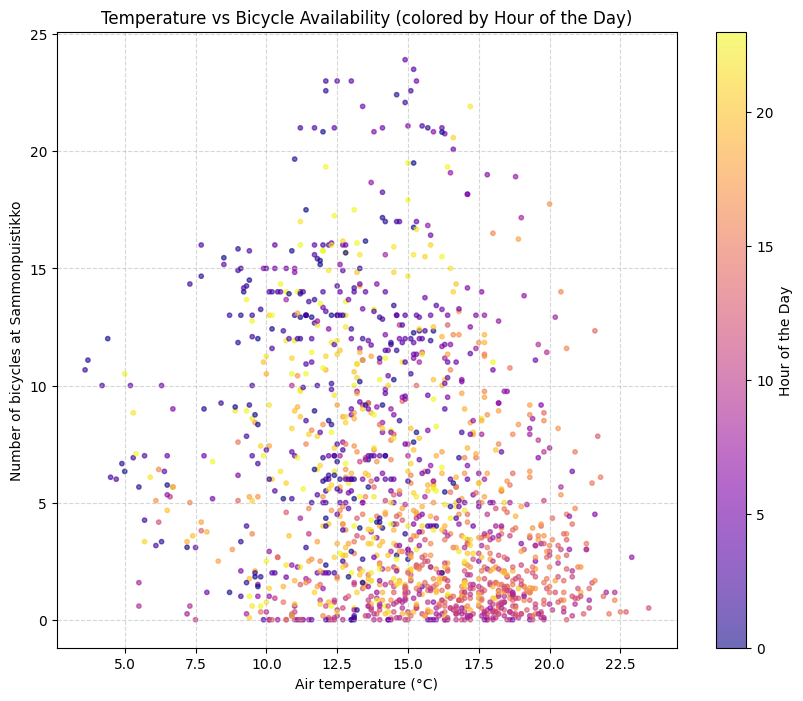

In [21]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

# Load input csv data related to public city bicycles into pandas DataFrame
df_bicycles = pd.read_csv("exrc03p01_bicycles.csv")
# df_bicycles = pd.read_csv("DOWNLOAD THE FILE AS CSV AND PROVIDE NAME HERE")

# # Get basic information about data
# df_bicycles.info() # prints concise summary about DataFrame's structure
# print(df_bicycles.head()) # prints first five rows - default

# '''
# Bicycles data observation
# total 1442 rows
# No Null values for Month, Day and Hour columns, all are types on integer
# No Null value for Sammonpuistikko city data
# '''

# Load input CSV data related to hourly weather observations into pandas DataFrame
df_weather = pd.read_csv("exrc03p01_weather.csv")
# df_weather = pd.read_csv(""DOWNLOAD THE FILE AND PROVIDE NAME HERE")

# # Get basic information about data
# df_weather.info() # prints concise summary about DataFrame's structure
# print(df_weather.head()) # prints first five rows - default

# '''
# Weather data observation
# total 1464 rows 
# No Null values for month, day, time
# month and day columns values are integers
# time column values are object type with value like 01:00, 02:00
# '''

# Convert the 'time' column value and type to int, like 01:00 to 1 and 02:00 t0 2
# Used Pandas DataFrame's string methond ´split()´ along with ´astype()´ to convert datatype
df_weather["time"] = df_weather["time"].str.split(":").str[0].astype(int)

# # Print sample weather data for debugging post changing the ´time´ coloumn data 
# df_weather.info() # prints concise summary about DataFrame's structure
# print(df_weather.head()) # prints first five rows - default

# # Print Column names of both DataFrames to indentify merging columns
# print("Columns in df_bicycles DataFrame:", df_bicycles.columns)
# print("Columns in df_weather DataFrame:", df_weather.columns)

# Rename coloumn names for df_weather to match with df_bycyles to perform join operation
# Used Pandas DataFrame method ´rename()´
df_weather = df_weather.rename(columns={"month":"Month", "day":"Day", "time":"Hour"})

# # Print column names for debugging
# print("Columns in df_bicycles DataFrame post processing:", df_bicycles.columns)
# print("Columns in df_weather DataFrame post processing:", df_weather.columns)

# Combined dataframes df_bicyles and df_weather on ´Month´, ´Day´and ´Hour´ columns
# Used Pandas DataFrame method ´merge()' combine the bicycles and weather data
# ´on´ paramter used to provide on which column/s merge to be performed
# ´how´ parameter used to provide yype of merge to be performed. Used 'outer' to combine data from both DataFrames (ie union)
# ´índicator´ parameter set to 'True' to add a column to the output DataFrame called “_merge” with information on the source of each row
df_merged = pd.merge(df_bicycles, df_weather, on=["Month", "Day", "Hour"], how="outer", indicator = True )

# # Print sample for debugging
# df_merged.info()
# print(df_merged.head())
# print(df_merged.tail())
# print(df_merged.columns)

# Remove any row where column 'Sammonpuistikko' contain NaN
# Used Pandas DataFrame method ´dropna()´
df_cleaned = df_merged.dropna(subset=['Sammonpuistikko'])

# # Print sample for debugging post removing the NaN entries and load into csv
# df_cleaned.info()
# df_cleaned.to_csv("exrc_03_cleaned_output.csv", index=False)

# Calculate the correlation coefficient between air temperature & the number of available bicycles at the Sammonpuistikko station
r = df_cleaned["Sammonpuistikko"].corr(df_cleaned["air temperature (degC)"])
print(f"The correlation coefficient is approx: r = {r:.3f}")

# '''
# The correlation coefficient is approx: r = -0.256
# The relationship between air temperature and number of available bicycles at Sammonpuistikko is weak and negative.
# Which means as temperature increases, the number of available bicycles tends to decrease slightly, but not strongly.
# Temperature is not the only factor affecting availability. Time of day, weekday/weekend are other factors which affect it too.
# '''

# Plot a scatterplot to visualise the correlation coefficient between the temperature and the number of available bicycles at the Sammonpuistikko station
# Shows the impact of day of the time too for better clarity
# Used pyplot module from matplot libray

plt.figure(figsize=(10,8))
plt.title("Temperature vs Bicycle Availability (colored by Hour of the Day)")
scatter = plt.scatter(
    df_cleaned["air temperature (degC)"],  # x axis
    df_cleaned["Sammonpuistikko"],         # y axis
    c=df_cleaned["Hour"],                  # color by Hour of Day
    cmap="plasma",                         # good color map for continuous time
    alpha=0.6,                             # for better transparency
    s = 10                                 # for marker size
)
plt.colorbar(scatter, label="Hour of the Day")
plt.xlabel("Air temperature (°C)")
plt.ylabel("Number of bicycles at Sammonpuistikko")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## Problem 5. Gitlab (part 2/2)

Your task is to explore what kind of data is freely available for you in the LabraNet GitLab, and then clearly summarize / visualize the results.

**Please note:** Again, this problem is supposed to be hard. Harri doesn't know the answers in advance. Please do your best in trying to help Harri to better understand the GitLab data available for anyone with a user account.

### a) Initial instructions

Create a personal GitLab access token: `Click avatar --> Preferences --> User Settings sidebar --> Access Tokens --> Add new token`

  + Freely choose the name for the token (e.g. *dan fall 25*, it's for you only).
  + The same goes for the expiration date (one can always delete old tokens and create new ones if needed).

Choose the `api` scope (the topmost one).

Create the token and save it for yourself. Do not share your token to anyone (including Harri)!

### b) Test code

Below is a code snippet that should work for you too. The API documentation is [here](https://python-gitlab.readthedocs.io). See especially the [Getting Started with the API](https://python-gitlab.readthedocs.io/en/stable/api-usage.html) and [API Examples](https://python-gitlab.readthedocs.io/en/stable/api-objects.html) sections.

```python

'''
- initiate a gitlab api instance
- having the token hard-coded is a bad habit, please don't include in your handin
- see <tt>public/exrc_03/exrc_03_theory.ipynb</tt> for a better way

'''

# run config so that you have python-gitlab installed
import gitlab

gl = gitlab.Gitlab(
    'https://gitlab.labranet.jamk.fi',
    private_token='COPY_YOUR_PRIVATE_TOKEN_HERE'
)

# authenticate
gl.auth()

# get some of the projects available to you
projects = gl.projects.list()

# (to get all the projects, see documentation)

# print the results
for project in projects:
    print(project)
```

### c) Exercise template (AI-generated & modified):

1. **Setup and Authentication**:

- Use python-gitlab to connect to the GitLab instance.
- Ensure you have a personal access token for accessing public data.

2. **Data Collection**:

- Use the python-gitlab API to fetch e.g.:

  - List of public projects and their details.
  - Public groups and user information.

3. **Data Preparation**:

- Use pandas to organize the data into DataFrames.
- Clean and preprocess the data (handle missing values, parse dates, etc.).

4. **Exploratory Data Analysis (EDA)**:

- Analyze the distribution of projects, contributions, and group memberships.
- Identify the most popular projects based on stars and forks.

5. **Visualization**:

- Use matplotlib or seaborn to create visualizations:
  - Histograms of project counts, star counts, and forks.
  - Analysis of user activity (commits, issues, etc.).

6. **Insights and Conclusion**:

- Summarize your findings.
- Discuss any interesting trends or outliers observed in the data.



## Solution 5

# Labranet GitLab Projects, Groups and Users Analysis Summary

## Public Projects

There are a total of **2000+ public projects**.  
Most of these projects do not have any forks or stars, resulting in **highly skewed histogram distributions**.

- Only one project, **`IT_matematiikka`**, has **3 stars**.  
- Two other projects, **`core`** and **`moduulit-2022-2023`**, have **2 stars each**.  
- The **`basics-template`** project has the **highest number of forks**, with **~90 forks** in total.
- **core** project is most active terms of both **commits (~100,000)** and **issues (~6500)**.

---

## Public Groups

There are **600+ public groups** in total.

- None of the groups have two-factor authentication (2FA) enabled. This could increase the risk of unauthorized access to group resources.
- Default branch protection is enabled for almost all groups, ensuring a consistent level of security across projects.

---

## Users

There are **~1800 users** in GitLab.

- **NarsuMan** and **Marko Rintamäki** are the most active contributors based on the **number of commits**.  
- **Ghost User** and **Marko Rintamäki** are also the most active based on the **number of issues** created or resolved.

---

## Time and Resource Consumption

One of the **most time- and CPU-intensive tasks** was retrieving commit and issue information for all the public projects.  
For me, this process took approximately **20 minutes**.

---


Found total 2262 public projects.

*********** Top 10 Most Popular Projects by star_count ************
                  name  star_count  forks_count
       IT_matematiikka           3            0
                  core           2            1
    moduulit-2022-2023           2            0
              CSE-2023           1            0
         OpiKoodaamaan           1            0
     android-exercises           1            0
                  core           1            0
              CSE 2025           1            0
course-assignment-0200           1            0
                  site           1            0

********* Top 10 Most Popular Projects by forks_count *************
                                  name  forks_count  star_count
                       basics-template           89           0
    Tukko - Traffic Visualizer Backend           27           0
            Tukko - Traffic Visualizer           25           0
    node-express-realworld-example-app      

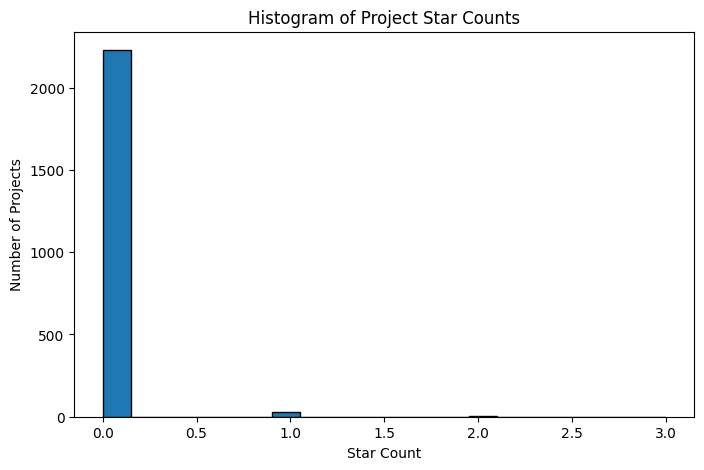

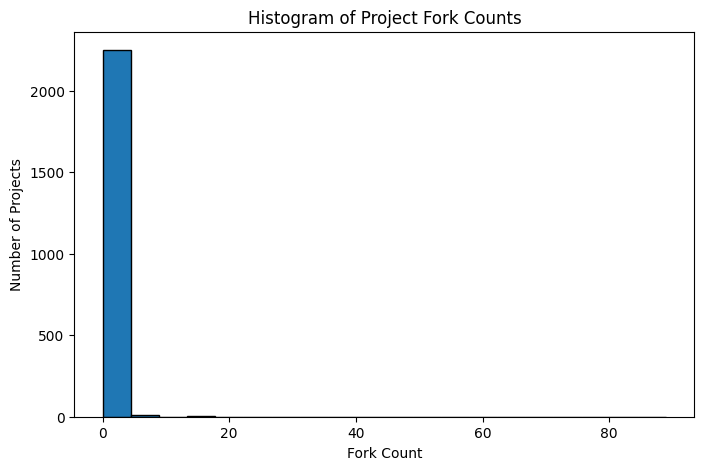

**** Top 10 users by most commits ****
user
NarsuMan            180565
Marko Rintamäki     106484
jamkit                9158
Paavo Nelimarkka      8742
L4136                 5226
narsuman              4467
Janne Alatalo         1536
K9069                 1519
M3268                 1484
Lassi Iiskola         1482
Name: activity_type, dtype: int64

**** Top 10 projecty by most commits ****
project_name
core                     101113
ttos0100                  23626
kurssi-ttos0100           23196
ttos0100-2020             11239
esimerkki-projekti-v1      7759
Core                       6362
guides-and-info            6110
eamk-2019                  5084
amk-2020                   4638
ttos0100-ht1               4570
Name: activity_type, dtype: int64

***** Top 10 users by most issues *****
user
Ghost User         4096
Marko Rintamäki    2413
AE9774              660
M3920               212
N3335               202
N1429               192
M3071               178
N4689               175
N309

In [4]:
import gitlab
import pandas as pd
import matplotlib.pyplot as plt


# Reading the file to get the PAT (Personal Access Token)
with open('/home/XXXXX/my_token') as handle:  # MENTION YOUR FILE NAME CONTAINING PAT
    mytoken = handle.read().strip()

# Create a connection (client) to a Labranet GitLab instance usng own private access token
gl = gitlab.Gitlab(
    'https://gitlab.labranet.jamk.fi',
    private_token = mytoken
)

# authenticate
gl.auth()

###################### Collect, Process and Analyse Public Projects Data ############################

# # This is to find what all the atttributes available on given PROJECT object and write to a txt file
# # I used ´data-analytics-fall-2025´ private project which I created on Problem 1

# project_info = gl.projects.list(search='data-analytics-fall-2025')
# if project_info:
#     project = project_info[0]
#     print(f"Project found. Project ID: {project.id}, Project Name: {project.name}")
#     keys_list = list(project.attributes.keys())
#     with open("project_attributes.txt", "w") as f:
#         for key in keys_list:
#             f.write(key + "\n")
#         print("Attributes saved to project_attributes.txt")
# else:
#     print("Project not found.")


# Gather information about public projects using ´gl´ GitLab Client object
# ´projects.list()´ method queries the GitLab Projects API to list projects
# ´iterator=True´ used for pagination by using 
# ´per_page=50´ used retrieve projects in chunks of 50 per api call
# ´visibility="public"´ used to get only public project
projects = gl.projects.list(visibility="public", iterator=True, )
projects_list = list(projects)
print(f"Found total {len(projects_list)} public projects.\n")

project_data = [
    {
        "id": project.id,
        "name": project.name,
        "path_with_namespace": project.path_with_namespace,
        "visibility": project.visibility,
        "star_count": project.star_count,
        "forks_count": getattr(project, "forks_count", 0), # to avoid failure in case attribute does not present
        "last_activity_at": project.last_activity_at
    }
    for project in projects_list
]

# Create a DataFrame for ´project_data´
df_projects = pd.DataFrame(project_data)

# # Get the basic information about DataFrame
# df_projects.info()

# # Show first few rows
# print(df_projects.head())

# Display top 10 projects by star_count
top_starred = df_projects.sort_values(by='star_count', ascending=False)
print("*********** Top 10 Most Popular Projects by star_count ************")
print(top_starred[['name', 'star_count', 'forks_count']].head(10).to_string(index=False))

# Display top 10 projects by forks_count
top_forked = df_projects.sort_values(by='forks_count', ascending=False)
print("\n********* Top 10 Most Popular Projects by forks_count *************")
print(top_forked[['name', 'forks_count', 'star_count']].head(10).to_string(index=False))

# Plot Histogram of Star Counts in Projects
plt.figure(figsize=(8, 5))
plt.hist(df_projects['star_count'], bins=20, edgecolor='black')
plt.title('Histogram of Project Star Counts')
plt.xlabel('Star Count')
plt.ylabel('Number of Projects')
plt.show()

# Plot Histogram of Fork Counts in Projects
plt.figure(figsize=(8, 5))
plt.hist(df_projects['forks_count'], bins=20, edgecolor='black')
plt.title('Histogram of Project Fork Counts')
plt.xlabel('Fork Count')
plt.ylabel('Number of Projects')
plt.show()

# Extract the User actvities about commits and issues for the Public Projects
user_activity = []
for proj in projects_list:
        project = gl.projects.get(proj.id)

        # Skip repos that can't have commits to avoid failures
        if getattr(project, "empty_repo", False) or not getattr(project, "default_branch", None):
            continue

        # Pull commits (use iterator to handle big projects safely)
        for commit in project.commits.list(iterator=True, per_page=100):
            user_activity.append({
                "project_id": project.id,
                "project_name": project.name,
                "activity_type": "commit",
                "user": getattr(commit, "author_name", None),
                "user_email": getattr(commit, "author_email", None),
                "date": commit.created_at,
            })

        # Pull commits (use iterator to handle big projects safely)   
        for issue in project.issues.list(iterator=True, per_page=100):
            user_activity.append({
            'project_id': project.id,
            'project_name': project.name,
            'activity_type': 'issue',
            'user': issue.author['name'],
            'user_email': issue.author.get('email'),
            'date': issue.created_at
        })      
       
# Create a DataFrame from the above user information list of dicts
df_activity = pd.DataFrame(user_activity)

# # Show first few rows
# print(df_activity.head())

# Find out top 10 users by most commits
top_commit_users = (
    df_activity[df_activity['activity_type'] == 'commit']
    .groupby('user')['activity_type']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

print("**** Top 10 users by most commits ****")
print(top_commit_users)

# Find out top 10 projects by most commits
top_commit_projects = (
    df_activity[df_activity['activity_type'] == 'commit']
    .groupby('project_name')['activity_type']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

print("\n**** Top 10 projecty by most commits ****")
print(top_commit_projects)

# Find out top 10 users by most issues
top_issue_users = (
    df_activity[df_activity['activity_type'] == 'issue']
    .groupby('user')['activity_type']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

print("\n***** Top 10 users by most issues *****")
print(top_issue_users)

# Find out top 10 projects by most issues
top_issue_projects = (
    df_activity[df_activity['activity_type'] == 'issue']
    .groupby('project_name')['activity_type']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

print("\n**** Top 10 projects by most issues ****")
print(top_issue_projects)


# Extract group path (namespace) from project path to get the group name of a project
# e.g., "my-group/my-project" → "my-group"
df_projects['group_name'] = df_projects['path_with_namespace'].apply(lambda x: x.split('/')[0])

# Count number of projects per group and sort on descending sequence 
projects_per_group = df_projects.groupby('group_name').size().sort_values(ascending=False)

print("\n**** Top 10 Groups by Number of Projects associated ****")
print(projects_per_group.head(10))



###################### Collect, Process and Analyse Public Groups Data ############################


# # This is to find what all the attributes available on given GROUP object and write to a txt file
# # I used ´TRASH-TESTS´ group which I got from GitLab UI
# group_info = gl.groups.list(all_available=True, search='TRASH-TESTS') # extract info for TRASH-TESTS
# if group_info:
#     group = group_info[0]
#     print(f"Group found. Group ID: {group.id}, Group Name: {group.name}")
#     keys_list = list(group.attributes.keys()) # extracting only keys ie attributes
#     with open("group_attributes.txt", "w") as f:
#         for key in keys_list:
#             f.write(key + "\n")
#         print("Attributes saved to group_attributes.txt")
# else:
#     print("Group not found.")


# Gather information about public grpups using ´gl´ GitLab Client object
# ´groups.list()´ method queries the GitLab Groups API to list groups
# ´iterator=True´ used for pagination by using 
# ´per_page=50´ used retrieve projects in chunks of 50 per api call
# ´all_available=True´ used to list all the availble groups, but by default its list only groups where you are member

groups = gl.groups.list(all_available=True, visibility="public", iterator=True, per_page=50)
groups_list = list(groups)
print(f"\nFound {len(groups_list)} public groups.\n")

# Collect Public Projects information in a list of dicts
# Used list comprehension for simplicity
group_data = [
    {
        "id": group.id,
        "name": group.name,
        "visibility": group.visibility,
        "archived": group.archived,
        "created_at": group.created_at,
        "require_two_factor_authentication": group.require_two_factor_authentication,
        "default_branch_protection": group.default_branch_protection,
        "auto_devops_enabled": group.auto_devops_enabled,
    }
    for group in groups_list
]

# Create a DataFrame from the ´group_data´
df_groups = pd.DataFrame(group_data)

# # Get the basic information about DataFrame
# df_groups.info()

# # Show first few rows
# print(df_groups.head())

# Perform group by on ´require_two_factor_authentication´ column only
two_factor_summary = (
    df_groups
    .groupby('require_two_factor_authentication')
    .size()
    .reset_index(name='count')
)

print("**** Stats about Required 2FA on the Public Groups ****")
print(two_factor_summary)

# Create a readable mapping for the protection levels since the values are 0, 1 and 2 for ´default_branch_protection´ column
protection_mapping = {
    0: 'Unprotected',
    1: 'Partially Protected',
    2: 'Fully Protected'
}

# Apply the mapping to a new column ´default_branch_protection_label´
df_groups['default_branch_protection_label'] = df_groups['default_branch_protection'].map(protection_mapping)

# Perform group by on ´default_branch_protection_label´ column only
branch_protection_summary = (
    df_groups
    .groupby('default_branch_protection_label')
    .size()
    .reset_index(name='count')
)

print("\n**** Summary about Default Branch Protection on the Public Groups ****")
print(branch_protection_summary)



###################### Collect, Process and Analyse Users Data ############################

# # This is to find what all the atttributes available on an USER object
# # I used ´XXXXX´ which my username in GitLab
# user_info = gl.users.list(search='XXXXX')
# if user_info:
#     user = user_info[0]
#     print(f"\nUser found. User ID: {user.id}, User Name: {user.name}")
#     keys_list = list(user.attributes.keys())
#     print("\nUser attributes are", keys_list)
# else:
#     print("User not found.")


# Gather information about USERS using ´gl´ GitLab Client object
# ´users.list()´ method queries the GitLab Users API to list users
# ´iterator=True´ used for pagination
# ´per_page=50´ used retrieve users in chunks of 50 per api call
users = gl.users.list(iterator=True, per_page=50)
users_list = list(users)
print(f"\nFound total {len(users_list)} users.\n")

# Collect Users information in a list of dicts
# Used list comprehension for simplicity
user_data = [
    {
        "id": user.id,
        "name": user.name,
        "state": user.state,
        "locked": user.locked,
        "public_email": user.public_email
    }
    for user in users_list
]

# Create a DataFrame for ´user_data´
df_users = pd.DataFrame(user_data)

# # Get the basic information about DataFrame
# df_users.info()

# # Show first few rows
# print(df_users.head())

# There are not many attributes on users data, generating stats to summarise the data
summary = pd.DataFrame({
    'Total Users': [len(df_users)], # count total users
    'Active Users': [(df_users['state'] == 'active').sum()], # count only active users
    'Locked Users': [df_users['locked'].sum()], # count only locked users
    'With Public Email': [df_users['public_email'].notna().sum()], # count users with public mail id
    'Without Public Email': [df_users['public_email'].isna().sum()] # count users with NO public mail id
})
print("*************************** Summarisation of Users Data ***********************")
print(summary.to_string(index=False))